# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bootcampviztools as bt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import urllib.request

## 2. Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv")

### 2.1 Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


### 2.3 Definir X e y

In [7]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 12)

In [8]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
X_train

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
25,1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
84,153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
10,275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
342,1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
890,131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...,...
106,578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
270,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
860,770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg
435,407,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg


In [11]:
y_train

25     2899.00
84     1249.26
10     1958.90
342    1030.99
890    1396.00
        ...   
106     389.00
270     549.00
860    1859.00
435     306.00
102    1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 2.5 MiniEDA

**Company**

In [12]:
df["Company"].unique()

array(['HP', 'Dell', 'Apple', 'Lenovo', 'MSI', 'Toshiba', 'Acer', 'Chuwi',
       'Asus', 'Huawei', 'Razer', 'Mediacom', 'Google', 'Samsung',
       'Xiaomi', 'Microsoft', 'Vero', 'LG', 'Fujitsu'], dtype=object)

In [13]:
df.groupby("Company")["Price_in_euros"].mean().sort_values()


Company
Vero          235.400000
Chuwi         246.945000
Mediacom      294.333333
Acer          607.613514
Fujitsu       769.000000
Lenovo       1053.578416
Asus         1068.684050
HP           1093.484639
Dell         1173.998680
Xiaomi       1199.616667
Toshiba      1276.558824
Samsung      1423.000000
Huawei       1424.000000
Apple        1540.322353
MSI          1713.425135
Microsoft    1716.970000
Google       1879.000000
LG           2299.000000
Razer        2987.333333
Name: Price_in_euros, dtype: float64

Hay 19 valores. Veo que hay marcas con un precio superior a otras marcas. Pero creo que por ahora haré un *One Hot Encoding* porque no solo la marca influye en el precio sino todo lo demás (CPU, RAM, etc)

**Product**

In [14]:
df["Product"]

0                  250 G6
1           Inspiron 7559
2             ProBook 450
3             Macbook Air
4           Inspiron 3567
              ...        
907         Inspiron 5570
908           Spectre Pro
909    IdeaPad 320-15IKBN
910                255 G6
911          Alienware 17
Name: Product, Length: 912, dtype: object

In [15]:
df["Product"].nunique()

480

Posiblemente no cuente con esta. El nombre del producto esta casi como un ID, el modelo puede memorizar los precios en vez de aprender. Tiene una alta cardinalidad 

**TypeName**

In [16]:
df["TypeName"]

0                Notebook
1                  Gaming
2                Notebook
3               Ultrabook
4                Notebook
              ...        
907              Notebook
908    2 in 1 Convertible
909              Notebook
910              Notebook
911                Gaming
Name: TypeName, Length: 912, dtype: object

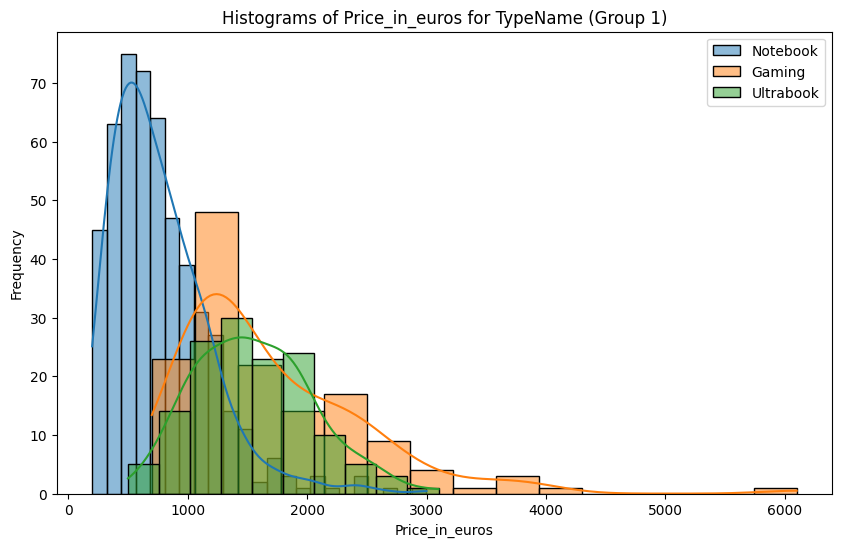

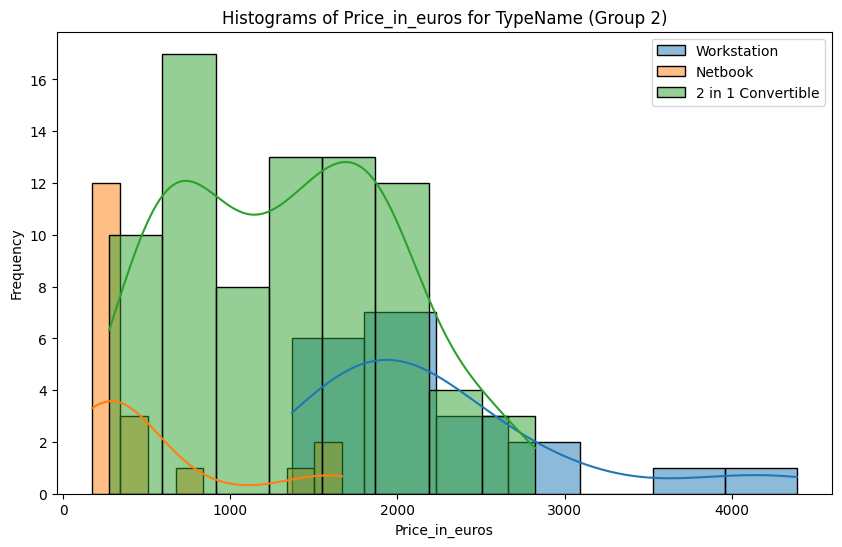

In [17]:
bt.plot_grouped_histograms(df, cat_col= "TypeName", num_col= "Price_in_euros", group_size= 3)

In [18]:
df["TypeName"].value_counts()

TypeName
Notebook              509
Gaming                143
Ultrabook             141
2 in 1 Convertible     80
Workstation            20
Netbook                19
Name: count, dtype: int64

Esta me la quedo. Baja cardinalidad.. Seguramente le haga un **One Hot Encoding**

**Inches**

In [19]:
df["Inches"].describe()

count    912.000000
mean      14.981579
std        1.436719
min       10.100000
25%       14.000000
50%       15.600000
75%       15.600000
max       18.400000
Name: Inches, dtype: float64

In [20]:
df["Inches"].value_counts().sort_index()

Inches
10.1      2
11.3      1
11.6     28
12.0      4
12.3      2
12.5     27
13.0      2
13.3    114
13.5      5
13.9      3
14.0    150
14.1      1
15.0      3
15.4      3
15.6    453
17.3    113
18.4      1
Name: count, dtype: int64

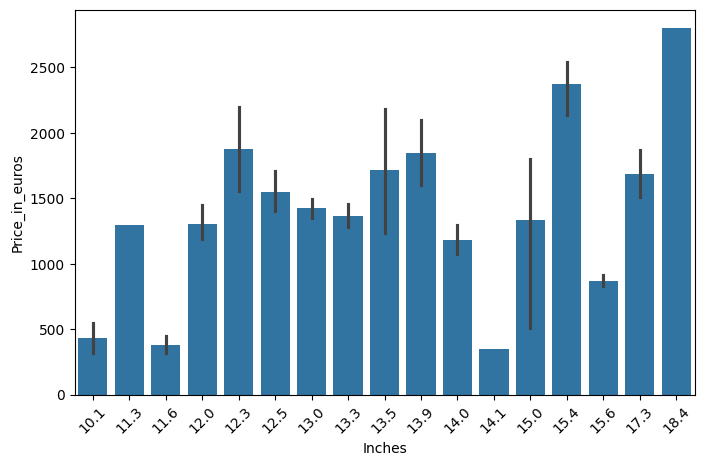

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Inches", y="Price_in_euros", estimator=np.mean)
plt.xticks(rotation=45)
plt.show()


Esta me la quedo. Puede ser influyente pero no la mas relevante. Podria usarla tal cual o agruparla por ejemplo en: <13 = pequeña, <16 = media y el resto en grande. Y despues usar un **One Hot Encoding**

**ScreenResolution**

In [22]:
df["ScreenResolution"].value_counts()


ScreenResolution
Full HD 1920x1080                                349
1366x768                                         211
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         32
Full HD / Touchscreen 1920x1080                   30
1600x900                                          14
Quad HD+ / Touchscreen 3200x1800                  11
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel 4K Ultra HD 3840x2160                    5
IPS Panel Retina Display 2560x1600                 5
Touchscreen 2256x1504                              5
1440x900                                           4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Retina Display 2304x1440                 4
IPS Panel 1366x768           

Tal cual no se puede usar. Puedo sacar varias variables de esta. Si tiene o no **Touchscreen**. Si tiene o no **IPS**. **Resolucion_X** y **Resolucion_Y**. Tambien puedo sacar el **PPI**(Pixel por pulgada) combinando las resoluciones con las pulgadas. Despues eliminaria esta columna.

In [23]:
df["Touchscreen"] = df["ScreenResolution"].str.contains("Touchscreen").astype(int)

In [24]:
df["Touchscreen"].value_counts()

Touchscreen
0    781
1    131
Name: count, dtype: int64

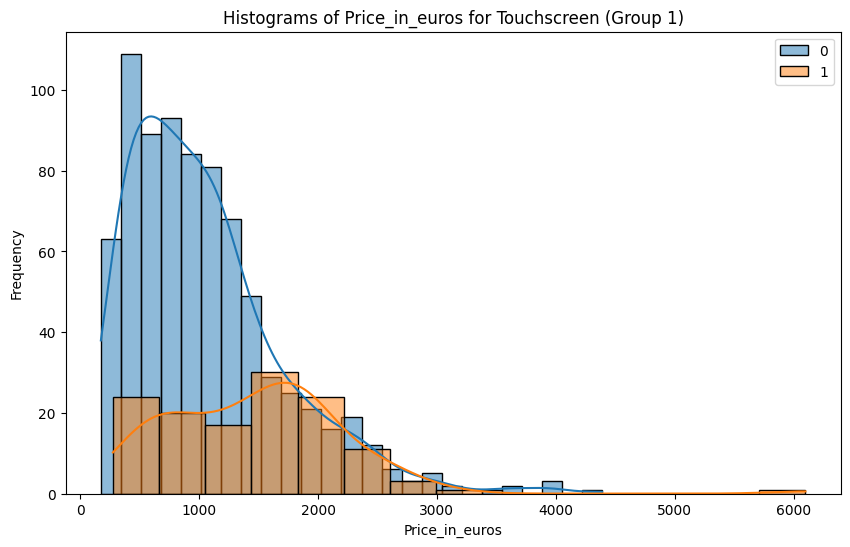

In [25]:
bt.plot_grouped_histograms(df, cat_col= "Touchscreen", num_col= "Price_in_euros", group_size= 2)

Se cruzan un poco, puede ser interesante pero desbalanceada. 

In [26]:
df["IPS"] = df["ScreenResolution"].str.contains("IPS").astype(int)

In [27]:
df["IPS"].value_counts()

IPS
0    661
1    251
Name: count, dtype: int64

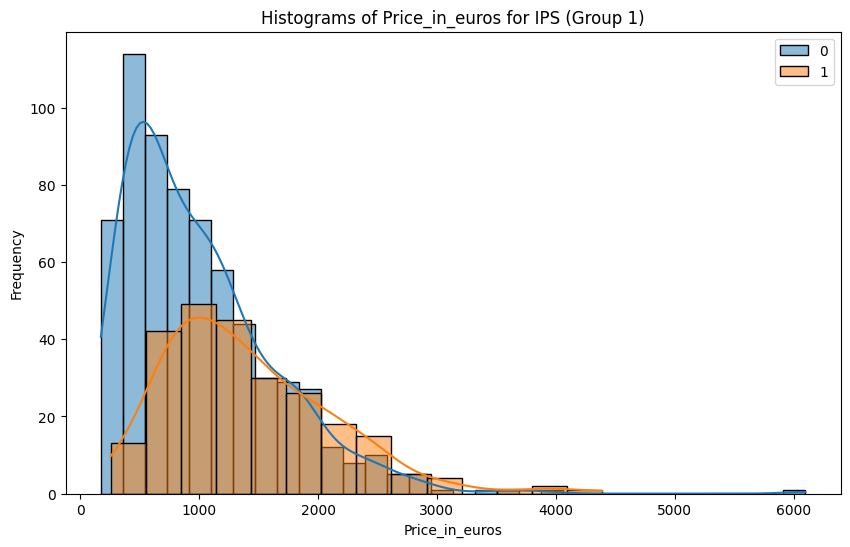

In [28]:
bt.plot_grouped_histograms(df, cat_col= "IPS", num_col= "Price_in_euros", group_size= 2)

Muy parecida a Touchscreen, aunque algo menos desbalanceada. Se cruzan un poco. 

In [29]:
df["X_res"] = df["ScreenResolution"].str.extract(r'(\d+)x').astype(int)
df["Y_res"] = df["ScreenResolution"].str.extract(r'x(\d+)').astype(int)

In [30]:
df["X_res"].value_counts()

X_res
1920    580
1366    228
3840     26
2560     23
3200     21
1600     14
2256      5
1440      4
2304      4
2880      3
2160      2
2400      2
Name: count, dtype: int64

In [31]:
df["Y_res"].value_counts()

Y_res
1080    577
768     228
2160     26
1800     24
1440     24
900      18
1600      7
1504      5
1200      3
Name: count, dtype: int64

In [32]:
df["PPI"] = ((df["X_res"]**2 + df["Y_res"]**2)**0.5) / df["Inches"]

In [33]:
df["PPI"].value_counts()

PPI
141.211998    293
100.454670    149
157.350512     95
127.335675     93
165.632118     71
111.935204     39
135.094211     27
276.053530     21
176.232574     17
209.800683     15
106.113062     14
282.423996     11
331.264236      7
117.826530      5
226.983005      5
125.367428      5
200.842560      5
127.677940      4
226.415547      4
352.465147      4
146.860478      3
254.671349      3
220.534624      3
224.173809      2
199.692071      2
158.482530      2
234.507400      2
90.583402       2
189.905791      1
220.842824      1
194.947537      1
169.780899      1
111.141337      1
316.965060      1
119.723216      1
234.976765      1
161.725391      1
Name: count, dtype: int64

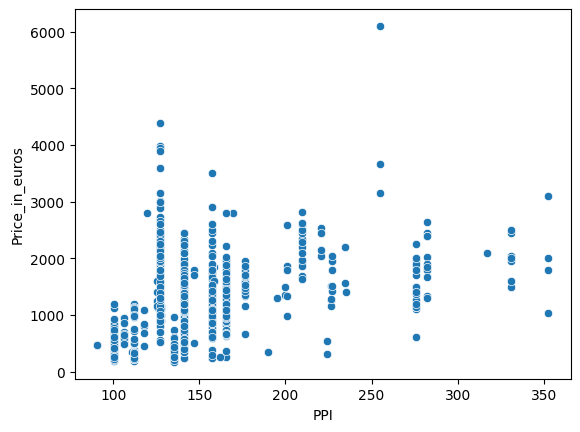

In [34]:
sns.scatterplot(data=df, x="PPI", y="Price_in_euros")
plt.show()


Voy a quedarme con **Touchscreen**, con **IPS** y con **PPI**. 

**CPU**

In [35]:
X_train["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       100
Intel Core i7 7700HQ 2.8GHz       82
Intel Core i7 7500U 2.7GHz        77
Intel Core i5 8250U 1.6GHz        46
Intel Core i7 8550U 1.8GHz        40
                                ... 
Intel Core i5 7500U 2.7GHz         1
Intel Core i3 6100U 2.1GHz         1
Intel Core M 1.1GHz                1
Intel Xeon E3-1535M v5 2.9GHz      1
AMD E-Series 6110 1.5GHz           1
Name: count, Length: 93, dtype: int64

Aqui pasa algo parecido que con las pantallas.  
Voy a sacar 3 variables. 
- Voy a sacar los Ghz. 
- Voy a sacar la marca. 
- Y voy a sacar la gama (i3, i5, Ryzen, etc)

In [36]:
df["Cpu_GHz"] = df["Cpu"].str.extract(r'(\d+\.?\d*)GHz').astype(float)

In [37]:
df["Cpu_GHz"].value_counts()

Cpu_GHz
2.50    199
2.80    120
2.70    117
1.60    107
2.00     60
2.30     58
1.80     51
2.60     47
1.10     37
2.40     33
2.90     15
3.00     12
1.20     10
1.50      9
1.44      9
2.20      7
1.30      5
3.60      4
0.90      3
3.10      2
1.90      2
2.10      2
1.00      1
3.20      1
1.92      1
Name: count, dtype: int64

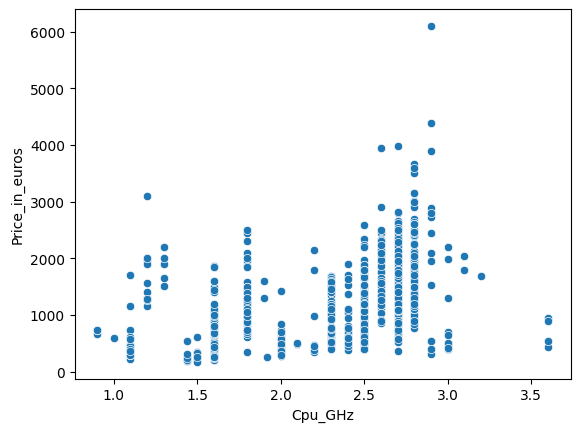

In [38]:
sns.scatterplot(data=df, x="Cpu_GHz", y="Price_in_euros")
plt.show()


In [39]:
df["Cpu_Brand"] = df["Cpu"].apply(lambda x: x.split()[0])

In [40]:
df["Cpu_Brand"].value_counts()

Cpu_Brand
Intel    870
AMD       42
Name: count, dtype: int64

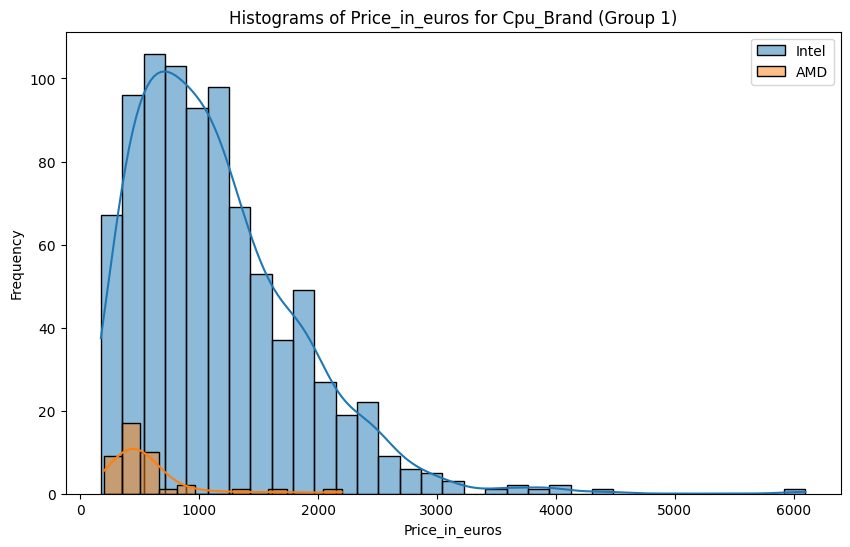

In [41]:
bt.plot_grouped_histograms(df, cat_col= "Cpu_Brand", num_col= "Price_in_euros", group_size= 2)

In [42]:
def extract_cpu_type(text):
    if "i3" in text:
        return "i3"
    elif "i5" in text:
        return "i5"
    elif "i7" in text:
        return "i7"
    elif "i9" in text:
        return "i9"
    elif "Ryzen" in text:
        return "Ryzen"
    elif "Celeron" in text:
        return "Celeron"
    elif "Pentium" in text:
        return "Pentium"
    else:
        return "Other"

df["Cpu_Type"] = df["Cpu"].apply(extract_cpu_type)

In [43]:
df["Cpu_Type"].value_counts()

Cpu_Type
i7         374
i5         282
i3          93
Celeron     70
Other       66
Pentium     24
Ryzen        3
Name: count, dtype: int64

In [44]:
df.groupby("Cpu_Type")["Price_in_euros"].mean().sort_values()

Cpu_Type
Celeron     315.562857
Pentium     432.321667
i3          547.838065
Other       720.880909
i5         1012.285638
i7         1583.536417
Ryzen      1731.000000
Name: Price_in_euros, dtype: float64

- Mantener Cpu_GHz (numérica)  
- Mantener Cpu_Type (OneHot)  
- No mantenedria Cpu_Brand. Creo que no aporta nada
- Eliminar columna original Cpu

**RAM**

In [45]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '12GB', '32GB', '6GB', '2GB', '64GB', '24GB'],
      dtype=object)

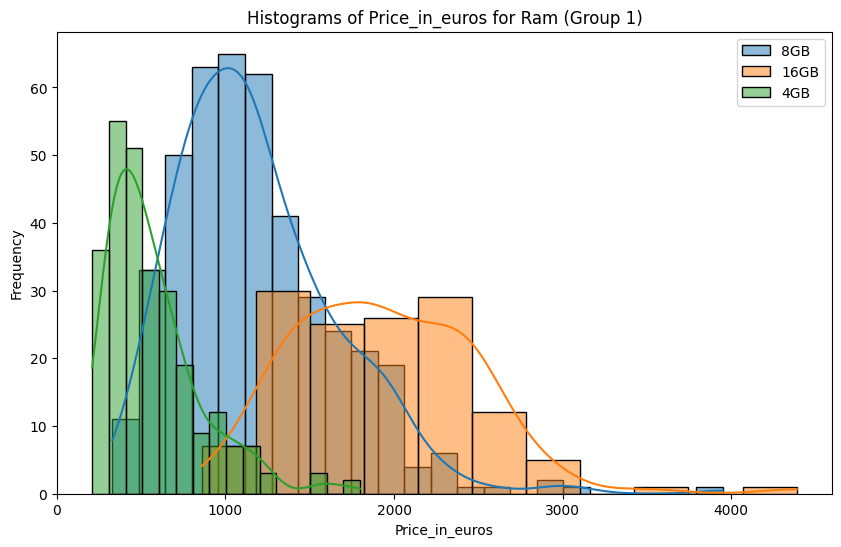

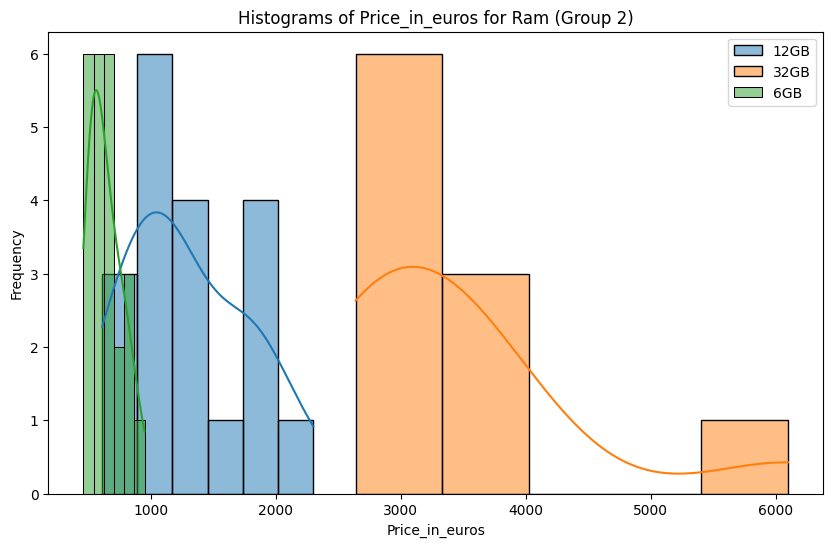

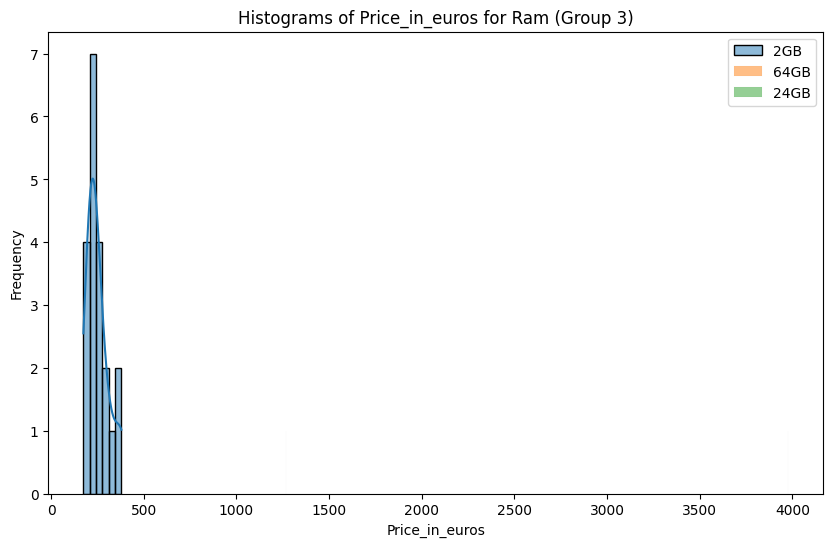

In [46]:
bt.plot_grouped_histograms(df, cat_col= "Ram", num_col= "Price_in_euros", group_size= 3)

Me la quedo. Hay que eliminar las letras y convertirla en una variable numérica. 

**MEMORY**

In [47]:
df["Memory"]

0                 256GB SSD
1                   1TB HDD
2                   1TB HDD
3       128GB Flash Storage
4                   1TB HDD
               ...         
907               256GB SSD
908               256GB SSD
909                 2TB HDD
910               500GB HDD
911    256GB SSD +  1TB HDD
Name: Memory, Length: 912, dtype: object

In [48]:
df["Memory"].value_counts()

Memory
256GB SSD                        282
1TB HDD                          152
500GB HDD                         92
512GB SSD                         83
128GB SSD +  1TB HDD              67
128GB SSD                         54
256GB SSD +  1TB HDD              52
32GB Flash Storage                33
1TB SSD                           12
64GB Flash Storage                11
2TB HDD                            8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               6
16GB Flash Storage                 6
1.0TB Hybrid                       5
32GB SSD                           5
128GB Flash Storage                4
180GB SSD                          3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             1
128GB SSD +  2TB HDD               1
512GB SSD +  512GB SSD             1
64GB Flash Storage +  1TB HDD      1
64GB SSD                       

Aqui podemos separarlo en 3 columnas. Una para el HDD, otra para SDD y otra para Flash Storage. Tambien pasaría todo los Teras a Gigas. 

In [49]:
df["Memory"] = df["Memory"].str.replace("TB", "000GB", regex=False) # Técnicamente tendrian que ser 1024 en vez de 1000.

In [50]:
df["Memory"].value_counts()

Memory
256GB SSD                           282
1000GB HDD                          152
500GB HDD                            92
512GB SSD                            83
128GB SSD +  1000GB HDD              67
128GB SSD                            54
256GB SSD +  1000GB HDD              52
32GB Flash Storage                   33
1000GB SSD                           12
64GB Flash Storage                   11
2000GB HDD                            8
512GB SSD +  1000GB HDD               8
256GB Flash Storage                   7
256GB SSD +  2000GB HDD               6
16GB Flash Storage                    6
1.0000GB Hybrid                       5
32GB SSD                              5
128GB Flash Storage                   4
180GB SSD                             3
16GB SSD                              3
1000GB SSD +  1000GB HDD              2
512GB SSD +  2000GB HDD               2
256GB SSD +  256GB SSD                1
128GB SSD +  2000GB HDD               1
512GB SSD +  512GB SSD           

In [51]:
import re

def extract_storage(text, storage_type):
    total = 0
    parts = text.split(" + ")
    
    for part in parts:
        if storage_type in part:
            number = re.search(r'\d+', part)
            if number:
                total += int(number.group())
                
    return total

df["SSD"] = df["Memory"].apply(lambda x: extract_storage(x, "SSD"))
df["HDD"] = df["Memory"].apply(lambda x: extract_storage(x, "HDD"))
df["Flash"] = df["Memory"].apply(lambda x: extract_storage(x, "Flash"))


In [52]:
df["SSD"].value_counts()

SSD
256     341
0       325
128     122
512      94
1000     14
32        5
180       3
16        3
1024      1
768       1
64        1
240       1
8         1
Name: count, dtype: int64

In [53]:
df["HDD"].value_counts()

HDD
0       516
1000    282
500      93
2000     18
128       1
1         1
32        1
Name: count, dtype: int64

In [54]:
df["Flash"].value_counts()

Flash
0      849
32      33
64      12
256      7
16       6
128      4
512      1
Name: count, dtype: int64

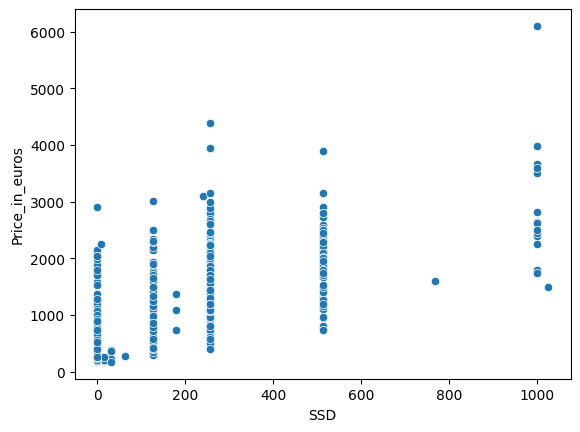

In [55]:
sns.scatterplot(data=df, x="SSD", y="Price_in_euros")
plt.show()

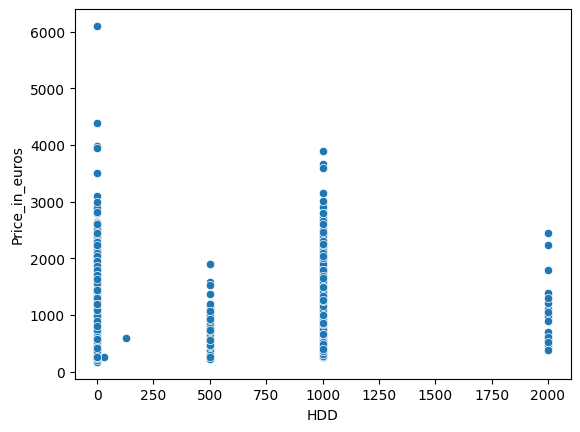

In [56]:
sns.scatterplot(data=df, x="HDD", y="Price_in_euros")
plt.show()


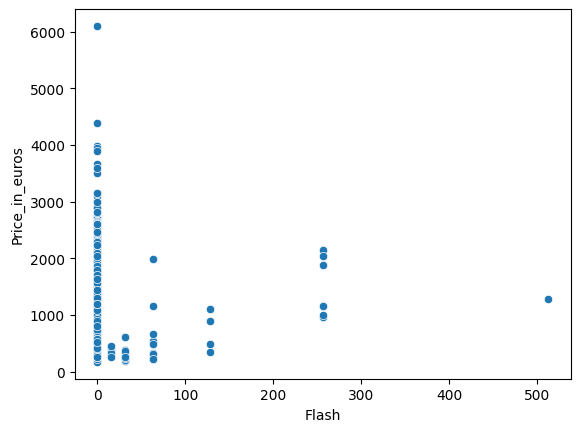

In [57]:
sns.scatterplot(data=df, x="Flash", y="Price_in_euros")
plt.show()

Mantendría:
- SSD (numérica)  
- HDD (numérica)--
- Flash (numérica), aunque con esta tengo dudas.   
Y eliminaría Memory.

**Gpu**

In [58]:
df["Gpu"]

0               Intel HD Graphics 520
1      Nvidia GeForce GTX 960<U+039C>
2                Nvidia GeForce 930MX
3              Intel HD Graphics 6000
4                  AMD Radeon R5 M430
                    ...              
907                    AMD Radeon 530
908             Intel HD Graphics 520
909             Intel HD Graphics 620
910                     AMD Radeon R2
911           Nvidia GeForce GTX 1060
Name: Gpu, Length: 912, dtype: object

In [59]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620       185
Intel HD Graphics 520       125
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon RX 540             1
Nvidia Quadro M2000M          1
Nvidia GeForce GTX 940M       1
AMD Radeon R5 520             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

Aqui podemos sacar 2 cosas. La marca, si es integrada o no (Si es intel casi siempre son integradas, si son AMD/Nvidia son dedicadas)  
Otra idea seria sacar la potencia y agruparlas en integradas, baja, media y alta. 

In [60]:
df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0])

In [61]:
df["Gpu_Brand"].value_counts()

Gpu_Brand
Intel     509
Nvidia    284
AMD       119
Name: count, dtype: int64

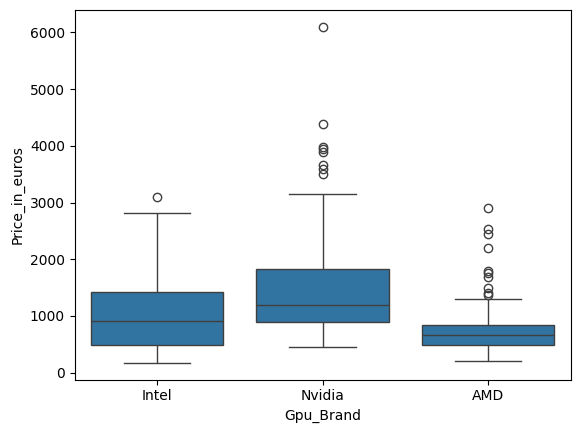

In [62]:
sns.boxplot(data=df, x="Gpu_Brand", y="Price_in_euros")
plt.show()

In [63]:
df["Dedicated_GPU"] = df["Gpu"].apply(
    lambda x: 0 if "Intel" in x else 1
)

In [64]:
df["Dedicated_GPU"].value_counts()

Dedicated_GPU
0    509
1    403
Name: count, dtype: int64

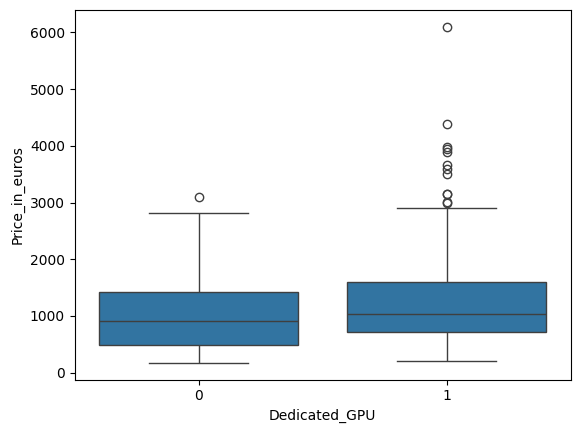

In [65]:
sns.boxplot(data=df, x="Dedicated_GPU", y="Price_in_euros")
plt.show()


Voy a probar solo con Dedicated_GPU y con GPU_Brand

**OpSys**

In [66]:
df["OpSys"].value_counts()

OpSys
Windows 10      741
Linux            48
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

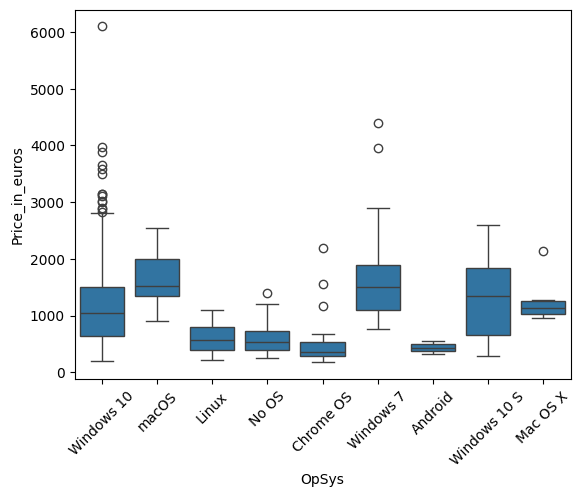

In [67]:
sns.boxplot(data=df, x="OpSys", y="Price_in_euros")
plt.xticks(rotation=45)
plt.show()

Simplificaria un poco las variables, todas las de Windows en la misma por ejemplo. Y después un OneHot

In [68]:
def simplify_os(os):
    if "Windows" in os:
        return "Windows"
    if "Mac" in os:
        return "Mac"
    if "Linux" in os:
        return "Linux"
    if "Chrome" in os:
        return "Chrome"
    return "Other"

df["OpSys_simplified"] = df["OpSys"].apply(simplify_os)

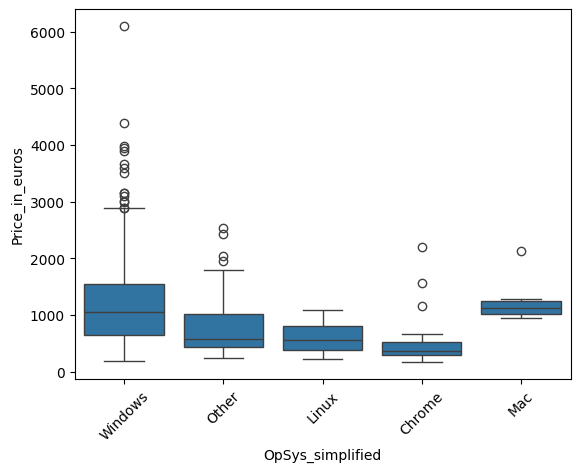

In [69]:
sns.boxplot(data=df, x="OpSys_simplified", y="Price_in_euros")
plt.xticks(rotation=45)
plt.show()

**Weight**

In [70]:
df["Weight"].value_counts()

Weight
2.2kg     91
2.1kg     40
2.4kg     31
2.5kg     29
2.3kg     27
          ..
0.91kg     1
2.15kg     1
2.54kg     1
1.18kg     1
4.33kg     1
Name: count, Length: 165, dtype: int64

Lo primero de todo habria que quitar los Kg y pasarlo a float

In [71]:
df["Weight"] = df["Weight"].str.replace("kg", "", regex=False)
df["Weight"] = df["Weight"].astype(float)

In [72]:
df["Weight"].describe()

count    912.000000
mean       2.026937
std        0.665466
min        0.690000
25%        1.490000
50%        2.040000
75%        2.300000
max        4.700000
Name: Weight, dtype: float64

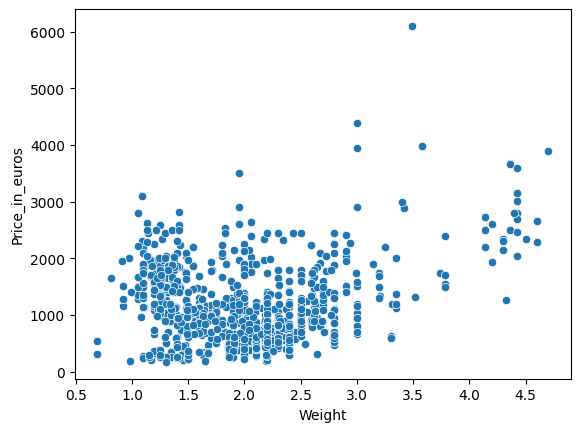

In [73]:
sns.scatterplot(data=df, x="Weight", y="Price_in_euros")
plt.show()

No parece lineal. Hay portatiles muy ligeros que son caros y portatiles pesado (Gaming) que tambien lo son. Aunque si que hay mas portatiles ligeros baratos, que portatiles pesados baratos. 

-----------------------------------------------------------------------------------------------------------------

## 3. Preprocesado

Quiero hacerlo con pipline. No estoy muy seguro de como hacer las transformaciones dentro de pipline. He visto por internet que lo mas limpio y robusto es usar transformadores custom (clases)

In [ ]:
class LaptopFeatureEngineer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        X = X.copy()
        df = pd.DataFrame(index=X.index)

        # Company        
        df["Company"] = X["Company"]

        # TypeName       
        df["TypeName"] = X["TypeName"]

        
        # Inches → tamaño        
        def size_category(x):
            if x < 13:
                return "pequeña"
            elif x < 16:
                return "media"
            else:
                return "grande"
        
        df["Size"] = X["Inches"].apply(size_category)

        
        # ScreenResolution
        df["Touchscreen"] = X["ScreenResolution"].str.contains("Touchscreen", case=False, na=False).astype(int)
        df["IPS"] = X["ScreenResolution"].str.contains("IPS", case=False, na=False).astype(int)

        resolution = X["ScreenResolution"].str.extract(r'(\d+)x(\d+)')
        df["Resolucion_X"] = resolution[0].astype(float)
        df["Resolucion_Y"] = resolution[1].astype(float)

        
        # PPI (Pixel por pulgada)
        df["PPI"] = np.sqrt(df["Resolucion_X"]**2 + df["Resolucion_Y"]**2) / X["Inches"]

        
        # CPU
        df["Cpu_Ghz"] = X["Cpu"].str.extract(r'(\d+\.?\d*)GHz').astype(float)

        df["Cpu_Brand"] = X["Cpu"].str.split().str[0]

        def cpu_gama(cpu):
            if "i3" in cpu: return "i3"
            if "i5" in cpu: return "i5"
            if "i7" in cpu: return "i7"
            if "Ryzen 3" in cpu: return "Ryzen3"
            if "Ryzen 5" in cpu: return "Ryzen5"
            if "Ryzen 7" in cpu: return "Ryzen7"
            return "Other"
        
        df["Cpu_Gama"] = X["Cpu"].apply(cpu_gama)

        
        # RAM
        df["Ram"] = X["Ram"].str.replace("GB", "", regex=False).astype(float)

        # Memory
        def memory_to_gb(mem):
            mem = mem.replace("TB", "000").replace("GB", "")
            parts = mem.split("+")
            total = 0
            for part in parts:
                total += int(re.findall(r'\d+', part)[0])
            return total
        
        df["Total_Memory_GB"] = X["Memory"].apply(memory_to_gb)

        df["HDD"] = X["Memory"].str.contains("HDD", case=False, na=False).astype(int)
        df["SSD"] = X["Memory"].str.contains("SSD", case=False, na=False).astype(int)
        df["Flash"] = X["Memory"].str.contains("Flash", case=False, na=False).astype(int)

        
        # GPU
        df["Gpu_Brand"] = X["Gpu"].str.split().str[0]
        df["Gpu_Integrated"] = X["Gpu"].str.contains("Intel", case=False, na=False).astype(int)

        
        # OpSys
        def simplify_os(os):
            if "Windows" in os:
                return "Windows"
            if "Mac" in os:
                return "Mac"
            if "Linux" in os:
                return "Linux"
            return "Other"
        
        df["OpSys"] = X["OpSys"].apply(simplify_os)


        # Weight
        df["Weight"] = X["Weight"].str.replace("kg", "", regex=False).astype(float)

        return df

In [75]:
categorical_cols = [
    "Company",
    "TypeName",
    "Size",
    "Cpu_Brand",
    "Cpu_Gama",
    "Gpu_Brand",
    "OpSys"
]

numeric_cols = [
    "Touchscreen",
    "IPS",
    "Resolucion_X",
    "Resolucion_Y",
    "PPI",
    "Cpu_Ghz",
    "Ram",
    "Total_Memory_GB",
    "HDD",
    "SSD",
    "Flash",
    "Gpu_Integrated",
    "Weight"
]

In [ ]:
# ColumnTransformer


# LOG TRANSFORM (solo donde tiene sentido)

log_transformer = FunctionTransformer(np.log1p)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)



# PIPELINE FINAL

full_pipeline = Pipeline(steps=[
    ("feature_engineering", LaptopFeatureEngineer()),
    ("preprocessing", preprocessor)
])

In [77]:
X_train

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
25,1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
84,153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
10,275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
342,1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
890,131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...,...
106,578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
270,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
860,770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg
435,407,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg


In [78]:
X_train_transformed = full_pipeline.fit_transform(X_train)
X_train_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.26251658,
        -1.15608757,  1.44723815],
       [ 0.        ,  0.        ,  0.        , ..., -0.26251658,
        -1.15608757,  0.78821003],
       [ 0.        ,  1.        ,  0.        , ..., -0.26251658,
         0.86498638, -0.99416145],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.26251658,
         0.86498638, -1.27874178],
       [ 0.        ,  0.        ,  0.        , ..., -0.26251658,
         0.86498638,  0.24900521],
       [ 0.        ,  0.        ,  0.        , ..., -0.26251658,
        -1.15608757, -0.49989037]], shape=(729, 52))

In [79]:
X_test_transformed = full_pipeline.transform(X_test)

In [80]:
# Sacar los nombres de las variables
feature_names = full_pipeline.named_steps["preprocessing"].get_feature_names_out()

In [81]:
# Creación de un DF temporal para ver las variables.

X_transformed = full_pipeline.transform(X_train)

df_temporal = pd.DataFrame(
    X_transformed,
    columns=feature_names,
    index=X_train.index
)

In [82]:
df_temporal.describe()

,cat__Company_Acer,cat__Company_Apple,cat__Company_Asus,cat__Company_Chuwi,cat__Company_Dell,cat__Company_Fujitsu,cat__Company_Google,cat__Company_HP,cat__Company_Lenovo,cat__Company_MSI,...,num__Resolucion_Y,num__PPI,num__Cpu_Ghz,num__Ram,num__Total_Memory_GB,num__HDD,num__SSD,num__Flash,num__Gpu_Integrated,num__Weight
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,...,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02
mean,0.075446,0.017833,0.138546,0.001372,0.216735,0.002743,0.002743,0.212620,0.222222,0.041152,...,-1.340187e-16,2.936228e-16,-5.628785e-16,-1.583857e-16,9.807732e-17,6.944605e-17,-5.360748e-17,-9.746814e-18,1.900629e-16,-1.364554e-16
std,0.264291,0.132434,0.345709,0.037037,0.412304,0.052342,0.052342,0.409442,0.416025,0.198779,...,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.056024e+00,-1.271049e+00,-2.673592e+00,-1.250924e+00,-1.285507e+00,-8.994070e-01,-1.335082e+00,-2.625166e-01,-1.156088e+00,-2.012659e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.869378e-01,-4.315436e-01,-9.275499e-01,-8.495493e-01,-7.357163e-01,-8.994070e-01,-1.335082e+00,-2.625166e-01,-1.156088e+00,-7.994486e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.272515e-02,-1.145767e-01,4.304828e-01,-4.679954e-02,-2.096419e-01,-8.994070e-01,7.490179e-01,-2.625166e-01,8.649864e-01,9.358627e-03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.272515e-02,2.540637e-01,8.184922e-01,-4.679954e-02,8.683795e-01,1.111844e+00,7.490179e-01,-2.625166e-01,8.649864e-01,3.987843e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.890703e+00,4.710927e+00,2.564534e+00,1.119170e+01,4.128316e+00,1.111844e+00,7.490179e-01,3.809283e+00,8.649864e-01,3.993483e+00


-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [83]:
# RandomForestRegressor en el Pipeline
rf_pipeline = Pipeline(steps=[
    ("feature_engineering", LaptopFeatureEngineer()),
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [84]:
# Hiperparametros

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt", 0.8]
}


In [85]:
# El GridSearch con el pipeline

grid = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [86]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [None, 10, ...], 'model__max_features': ['sqrt', 0.8], 'model__min_samples_leaf': [1, 2], 'model__min_samples_split': [2, 5], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- 

In [87]:
print("Mejores parámetros:", grid.best_params_)
print("Mejor RMSE:", -grid.best_score_)


Mejores parámetros: {'model__max_depth': 20, 'model__max_features': 0.8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
Mejor RMSE: 288.24709532570154


In [88]:
best_model = grid.best_estimator_

In [89]:
y_pred = best_model.predict(X_test)

In [90]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print("RMSE Test:", rmse_test)
print("R2 Test:", r2_test)

RMSE Test: 365.0383115476676
R2 Test: 0.7595648138545861


## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [91]:
X_pred = pd.read_csv("./data/test.csv")
X_pred.head()
ids = X_pred["laptop_ID"].copy()

In [92]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [93]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [94]:
y_pred = best_model.predict(X_pred)

In [95]:
pd.Series(y_pred).describe()



count     391.000000
mean     1152.122698
std       656.592535
min       223.049000
25%       676.775097
50%      1043.908675
75%      1489.993940
max      5093.534125
dtype: float64

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [96]:
sample = pd.read_csv("data/sample_submission.csv")

In [97]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [98]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [99]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({
    "laptop_ID": ids,
    "Price_in_euros": y_pred
})

submission.to_csv("submission_RFR.csv", index=False)

In [100]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1396.540617
1,1281,292.139391
2,1168,407.911450
3,1231,964.861678
4,1020,868.032700


In [101]:
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [102]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [103]:
chequeador(submission)

You're ready to submit!
